In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Interpolation

Data interpolation is specifically used to handle missing or null values by estimating them based on available data. It helps maintain data continuity, especially in time-series data, sensor readings, or datasets where dropping missing values could lead to information loss.


## When to Apply Data Interpolation?

- When data has missing (NaN) values and needs to be estimated.

- When removing missing values would reduce dataset size significantly.

- When you want to maintain smooth trends in numerical data.

## Data Interpolation Methods
- Linear Interpolation
- Cubic Interpolation
- Polynomial Interpolation

# 1 Linear Interpolation
- Linear interpolation is a simple technique used to estimate missing values between two known data points using a straight-line approximation. It assumes a constant rate of change between adjacent points.
## When to Use Linear Interpolation Method ?
- Linear interpolation is best used in scenarios where the data follows a roughly linear trend between known points.
- When you have missing values in a dataset and the data varies linearly.

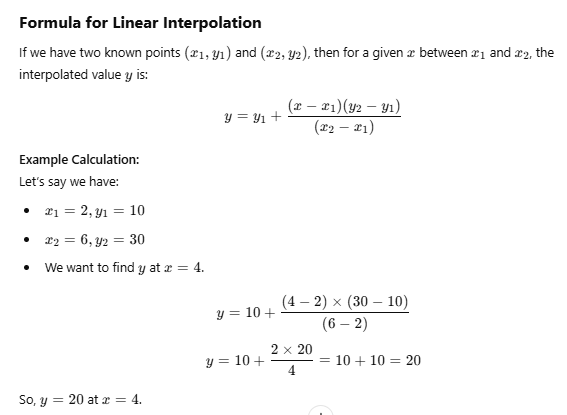

In [5]:
from sklearn.datasets import make_regression

In [6]:
# Step 1: Generate a regression dataset with 2 continuous features
X, y = make_regression(n_samples=500, n_features=2, noise=10, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

In [7]:
# Step 2: Introduce missing values in 'Feature 2' (e.g., 60% missing)
missing_fraction = 0.6  # 60% missing values
num_missing = int(missing_fraction * len(df))  

In [8]:
# Randomly select indices for missing values
missing_indices = np.random.choice(df.index, num_missing, replace=False)
df.loc[missing_indices, 'Feature 2'] = np.nan  # Set selected rows to NaN

In [9]:
# Step 3: Bar Chart for missing values count
missing_counts = df.isnull().sum()

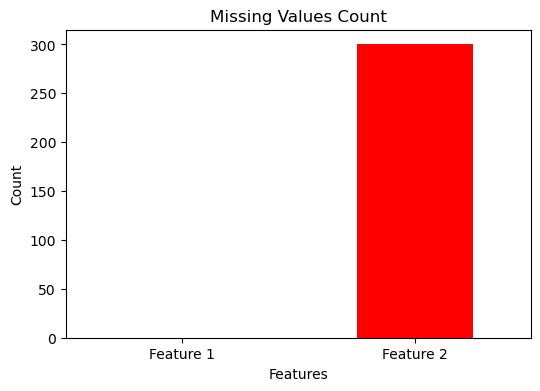

In [10]:
plt.figure(figsize=(6, 4))
missing_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Missing Values Count")
plt.ylabel("Count")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.show()

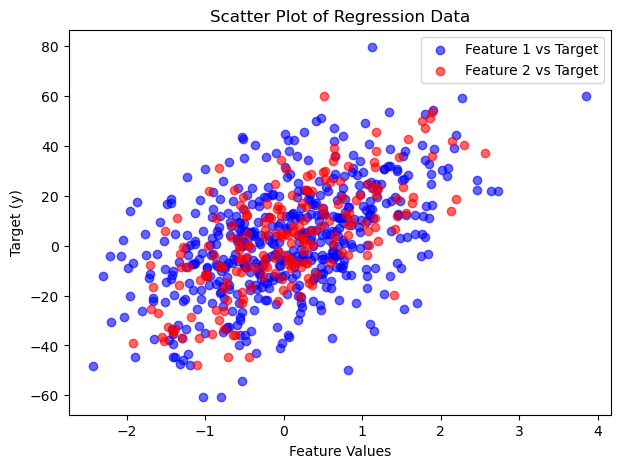

In [11]:
# Step 4: Scatter Plot for regression data (ignoring NaN values)
plt.figure(figsize=(7, 5))
plt.scatter(df['Feature 1'], y, label="Feature 1 vs Target", alpha=0.6, color="blue")
plt.scatter(df['Feature 2'], y, label="Feature 2 vs Target", alpha=0.6, color="red")  # May include NaN
plt.title("Scatter Plot of Regression Data")
plt.xlabel("Feature Values")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

In [12]:
df_interpolated = df.interpolate(method="linear")

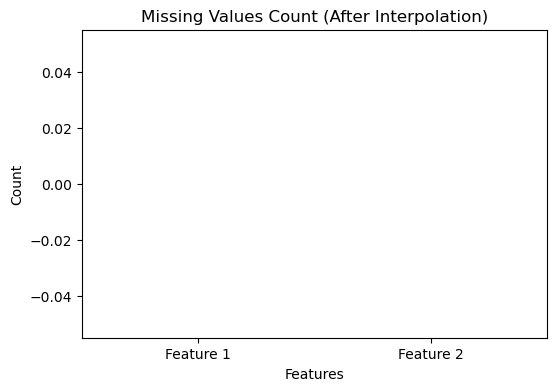

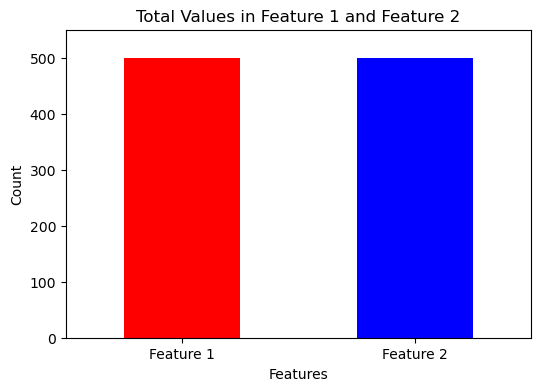

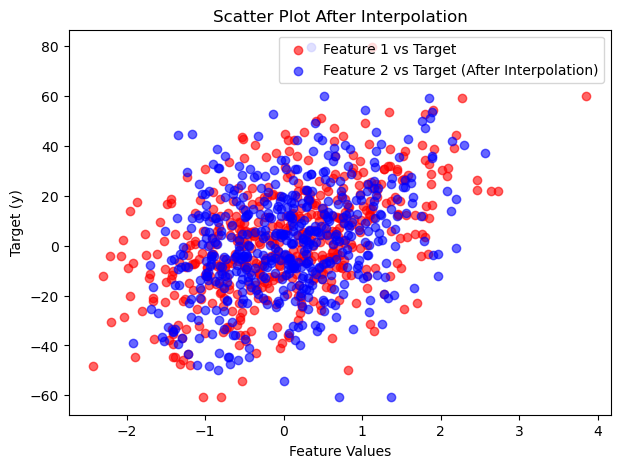

In [13]:
# Step 1: Bar Chart for Missing Values Count (After Interpolation)
missing_counts = df_interpolated.isnull().sum()

plt.figure(figsize=(6, 4))
missing_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Missing Values Count (After Interpolation)")
plt.ylabel("Count")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.show()

# Step 1: Count the total values (non-null) in Feature 1 and Feature 2
total_values = df_interpolated.count()

# Step 2: Plot a bar chart for total values in each feature
plt.figure(figsize=(6, 4))
total_values.plot(kind='bar', color=['red', 'blue'])
plt.title("Total Values in Feature 1 and Feature 2")
plt.ylabel("Count")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.ylim(0, len(df_interpolated) + 50)  # Adjusting y-axis limit for better visualization
plt.show()







# Step 2: Scatter Plot to Compare Feature 2 with Target
plt.figure(figsize=(7, 5))
plt.scatter(df_interpolated['Feature 1'], y, label="Feature 1 vs Target", alpha=0.6, color="red")
plt.scatter(df_interpolated['Feature 2'], y, label="Feature 2 vs Target (After Interpolation)", alpha=0.6, color="blue")
plt.title("Scatter Plot After Interpolation")
plt.xlabel("Feature Values")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

In [14]:
# Step 6: Print missing value statistics before & after
print("Missing Values Count BEFORE Interpolation:\n", df.isnull().sum())
print("Missing Values Count AFTER Interpolation:\n", df_interpolated.isnull().sum())

Missing Values Count BEFORE Interpolation:
 Feature 1      0
Feature 2    300
dtype: int64
Missing Values Count AFTER Interpolation:
 Feature 1    0
Feature 2    0
dtype: int64


# 2 Polynomial Interpolation Method
Polynomial Interpolation is a method of estimating missing values using a polynomial function that passes through the known data points. Instead of fitting a straight line (like Linear Interpolation), it fits a higher-degree polynomial (e.g., quadratic, cubic, etc.).

## When to Use Polynomial Interpolation?
You should use Polynomial Interpolation when: ✅ The data has a nonlinear trend – If the data follows a curved pattern instead of a straight line.
✅ Linear interpolation is not accurate enough – If linear interpolation underfits the data.
✅ You need a smooth estimate for missing values – If you want a continuous, smooth function rather than abrupt changes.

## Cubic interpolation

In [17]:
X = np.array([1,2,3,4,5,6])
y = []
for x in X:
    y.append(x**3)
y = np.array(y)

In [18]:
X,y

(array([1, 2, 3, 4, 5, 6]), array([  1,   8,  27,  64, 125, 216]))

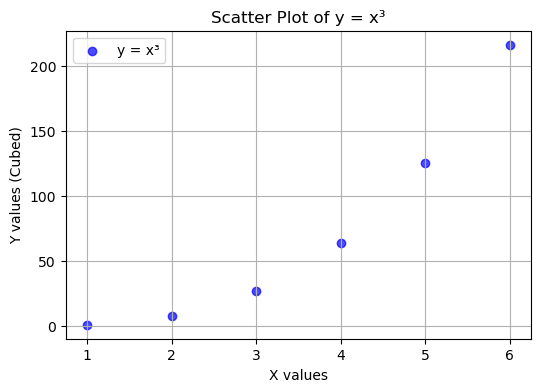

In [19]:
# Plot scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label="y = x³", alpha=0.7)

# Labels and Title
plt.xlabel("X values")
plt.ylabel("Y values (Cubed)")
plt.title("Scatter Plot of y = x³")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [20]:
from scipy.interpolate import interp1d

In [21]:
f = interp1d(X,y,kind= 'cubic')

In [22]:
x_new = np.linspace(1,6,10)
y_interp = f(x_new)
y_interp

array([  1.        ,   3.76406036,   9.40877915,  18.96296296,
        33.45541838,  53.91495199,  81.37037037, 116.85048011,
       161.38408779, 216.        ])

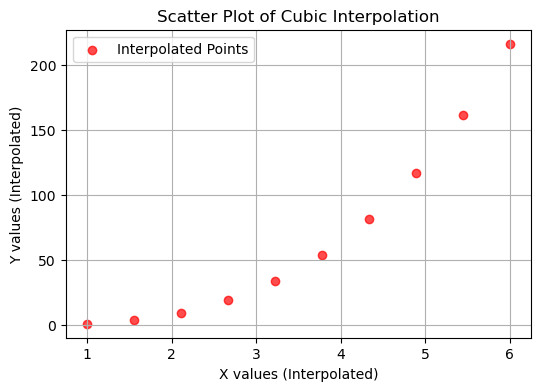

In [23]:
# Plot scatter plot for interpolated points
plt.figure(figsize=(6, 4))
plt.scatter(x_new, y_interp, color='red', label="Interpolated Points", alpha=0.7)

# Labels and Title
plt.xlabel("X values (Interpolated)")
plt.ylabel("Y values (Interpolated)")
plt.title("Scatter Plot of Cubic Interpolation")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [24]:
# make a datset which follows non_linear pattern


In [25]:
# Generate 100 data points
X = np.linspace(0, 10, 100)  # Feature 2 (Independent Variable)
Y = np.sin(X) * 10 + np.random.normal(0, 2, 100)  # Feature 1 (Dependent, Non-Linear)

In [26]:
# Convert to DataFrame
df = pd.DataFrame({'Feature 1': Y, 'Feature 2': X})

In [27]:
df

,Feature 1,Feature 2
0,1.393599,0.00000
1,-0.929460,0.10101
2,-1.040447,0.20202
3,2.469687,0.30303
4,2.815760,0.40404
...,...,...
95,-2.871305,9.59596
96,-2.968461,9.69697
97,-2.860942,9.79798
98,-6.112504,9.89899


In [28]:
# Now we need to introoduce null values in feature 1 of df at random indices
randm_indices = np.random.randint(0,len(df),40)
print(len(randm_indices))
print(randm_indices)

40
[38  3 58 12 43 70  2 54 24  8 29 63 51 15 90 87 60 66 84 58 53 99 64 46
 67 76 31 58 31 89 74 71  0 83  2 47 45 66 94 52]


In [74]:
# We need to see tthe values of feature 1 that are gong to be replaceed by null values 
# and repalce them with zero
for idx in randm_indices:
    for i,x in enumerate(df["Feature 1"]):
        if idx == i:
            df["Feature 1"][i] = np.nan

df.head(20)

C:\Users\bhosa\AppData\Local\Temp\ipykernel_3212\930332770.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Feature 1"][i] = np.nan


,Feature 1,Feature 2
0,NaN,0.000000
1,-0.929460,0.101010
2,NaN,0.202020
3,NaN,0.303030
4,2.815760,0.404040
5,6.917395,0.505051
6,6.836766,0.606061
7,8.539215,0.707071
8,NaN,0.808081
9,8.697450,0.909091


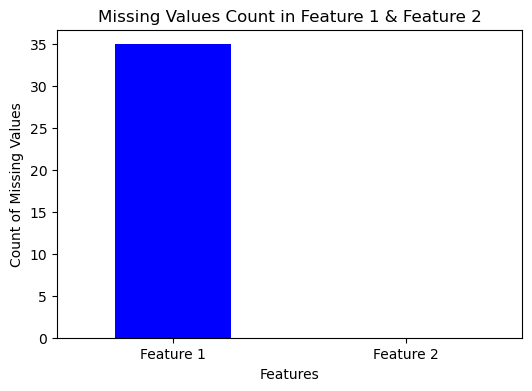

In [30]:
# Count missing values in each feature
missing_counts = df.isnull().sum()

# Plot bar chart comparing null value counts in both features
plt.figure(figsize=(6, 4))
missing_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Missing Values Count in Feature 1 & Feature 2")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.show()

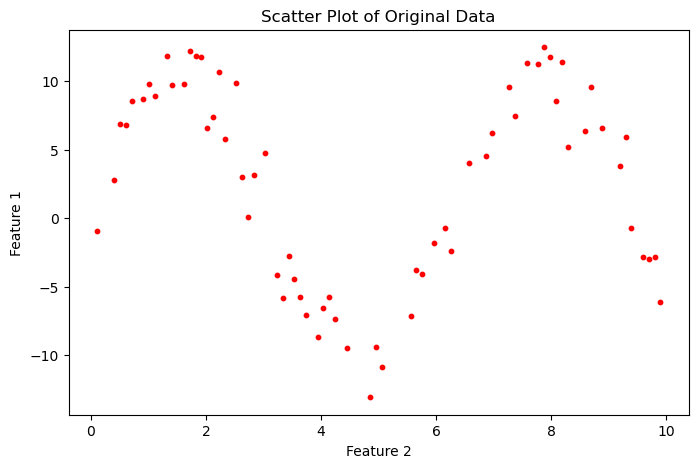

In [90]:
import matplotlib.pyplot as plt

# Scatter Plot for Original Data
plt.figure(figsize=(8, 5))
plt.scatter(df['Feature 2'], df['Feature 1'], color='red', s=10)
plt.title("Scatter Plot of Original Data")
plt.xlabel("Feature 2")
plt.ylabel("Feature 1")
plt.show()


# Cubic Interpolation for feature 1

In [44]:
from scipy.interpolate import interp1d

In [64]:
df.head(10)

,Feature 1,Feature 2
0,NaN,0.000000
1,-0.929460,0.101010
2,NaN,0.202020
3,NaN,0.303030
4,2.815760,0.404040
5,6.917395,0.505051
6,6.836766,0.606061
7,8.539215,0.707071
8,NaN,0.808081
9,8.697450,0.909091


In [72]:
f = interp1d(X,Y,kind="cubic")

In [68]:
feat1_new = np.linspace(1,10,200)
# feat1_new

In [80]:
feat2_new = f(feat1_new)

In [82]:

# Create a new DataFrame
dff = pd.DataFrame({'Feature 1': feat2_new, 'Feature 2': feat1_new})

In [84]:
dff

,Feature 1,Feature 2
0,9.777094,1.000000
1,9.558817,1.045226
2,9.069078,1.090452
3,8.951580,1.135678
4,9.448099,1.180905
...,...,...
195,-3.319434,9.819095
196,-4.832345,9.864322
197,-6.466056,9.909548
198,-7.487201,9.954774


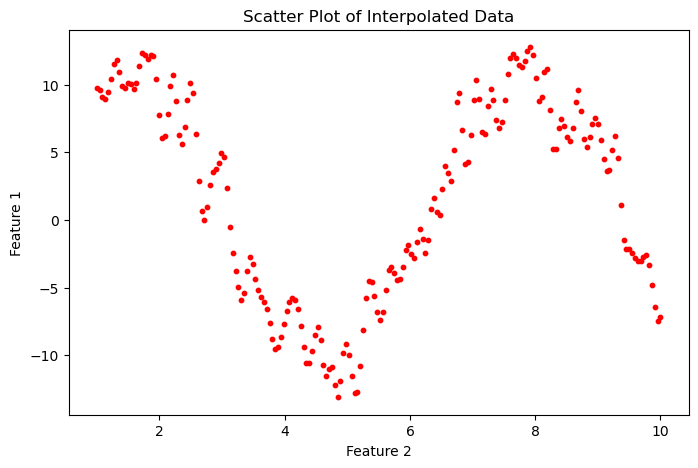

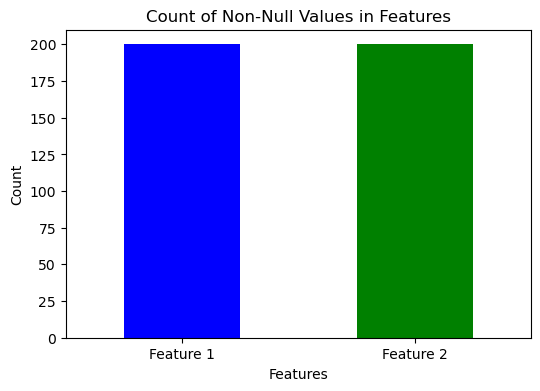

In [86]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(dff['Feature 2'], dff['Feature 1'], color='red', s=10)
plt.title("Scatter Plot of Interpolated Data")
plt.xlabel("Feature 2")
plt.ylabel("Feature 1")
plt.show()

# Bar Chart (Comparing Total Values in Both Features)
plt.figure(figsize=(6, 4))
dff.count().plot(kind='bar', color=['blue', 'green'])
plt.title("Count of Non-Null Values in Features")
plt.xlabel("Features")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
